# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/briannimbalker/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
pip install newsapi-python

  Using cached requests-2.21.0-py2.py3-none-any.whl (57 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached urllib3-1.24.3-py2.py3-none-any.whl (118 kB)
  Using cached idna-2.8-py2.py3-none-any.whl (58 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
  Attempting uninstall: idna
    Found existing installation: idna 3.2
    Uninstalling idna-3.2:
      Successfully uninstalled idna-3.2
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following

In [2]:
from newsapi import NewsApiClient

In [7]:
# Read your api key environment variable
load_dotenv()
api_key = "b214836428eb4d289784680cf633d31b" 

In [8]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [10]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy",
)

print(f"Bitcoin and BTC articles: {bitcoin_headlines['totalResults']}")

# Show info of first article
bitcoin_headlines["articles"][0]

Bitcoin and BTC articles: 8674


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Richard Lawler',
 'title': 'A fake press release claiming Kroger accepts crypto reached the retailer’s own webpage',
 'description': 'A crypto hoax claimed Kroger is accepting Bitcoin Cash. The fake press release was similar to one targeting Walmart earlier this year. The retailer quickly confirmed it’s fake, but not before the cryptocurrency’s price spiked by $30.',
 'url': 'https://www.theverge.com/2021/11/5/22765098/kroger-bitcoin-cash-cryptocurrency-hoax-pump-dump',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--mWg1kfPmspvfzY=/0x358:5000x2976/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22988084/1234440443.jpg',
 'publishedAt': '2021-11-05T13:32:14Z',
 'content': 'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]'}

In [12]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [13]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines['articles']:

    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
2,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000
3,2021-11-12,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.000,0.847
4,2021-10-21,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000


In [14]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines['articles']:

    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass


# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
2,2021-11-12,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.0,0.847
3,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
4,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907


In [15]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.133182,0.052380,0.021910,0.925720
std,0.355848,0.066516,0.046369,0.077688
min,-0.790600,0.000000,0.000000,0.659000
25%,0.000000,0.000000,0.000000,0.886250
50%,0.000000,0.000000,0.000000,0.927500
75%,0.415650,0.088750,0.000000,1.000000
max,0.862500,0.243000,0.280000,1.000000


In [16]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.210195,0.073070,0.023540,0.903400
std,0.355461,0.067262,0.046385,0.077334
min,-0.659700,0.000000,0.000000,0.660000
25%,0.000000,0.000000,0.000000,0.849250
50%,0.165150,0.072500,0.000000,0.904500
75%,0.514625,0.118750,0.000000,0.972250
max,0.822500,0.243000,0.209000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum 

Q: Which coin had the highest compound score?

A: Bitcoin with 0.8625

Q. Which coin had the highest positive score?

A: Equal both at .243

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [19]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}
sw_expanded = sw.union(sw_addons)

In [20]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

   
    # Convert the words to lowercase and remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [21]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = [tokenizer(text) for text in bitcoin_df.text]
bitcoin_df.head(2)

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[theres, big, new, presence, slurping, power, ..."


In [22]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = [tokenizer(text) for text in eth_df.text]
eth_df.head(2)

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0,0.0,0.0,1.0,"[new, crosschain, bridge, currently, connected..."
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0,0.0,0.0,1.0,"[mark, cuban, ha, advice, people, new, investi..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
# Generate the Bitcoin N-grams where N=2
btc_big_string = ' '.join(bitcoin_df['text'])
btc_processed = tokenizer(btc_big_string)
btc_bigrams = ngrams(btc_processed, n=2)

In [26]:
# Generate the Ethereum N-grams where N=2
eth_big_string = ' '.join(eth_df['text'])
eth_processed = tokenizer(eth_big_string)
eth_bigrams = ngrams(eth_processed, n=2)

In [27]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [29]:
# Use token_count to get the top 10 words for Bitcoin
top_10 = dict(token_count(btc_bigrams, 10))
btc_10_bigrams = pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])
btc_10_bigrams

,bigram,count


In [30]:
# Use token_count to get the top 10 words for Ethereum
top_10 = dict(token_count(eth_bigrams, 10))
eth_10_bigrams = pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])
eth_10_bigrams

,bigram,count
0,"(illustration, taken)",7
1,"(bitcoin, ethereum)",6
2,"(taken, june)",6
3,"(nov, reuters)",6
4,"(elon, musk)",5
5,"(char, bitcoin)",5
6,"(cryptocurrencies, bitcoin)",5
7,"(ethereum, dogecoin)",5
8,"(digital, asset)",5
9,"(new, york)",4


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

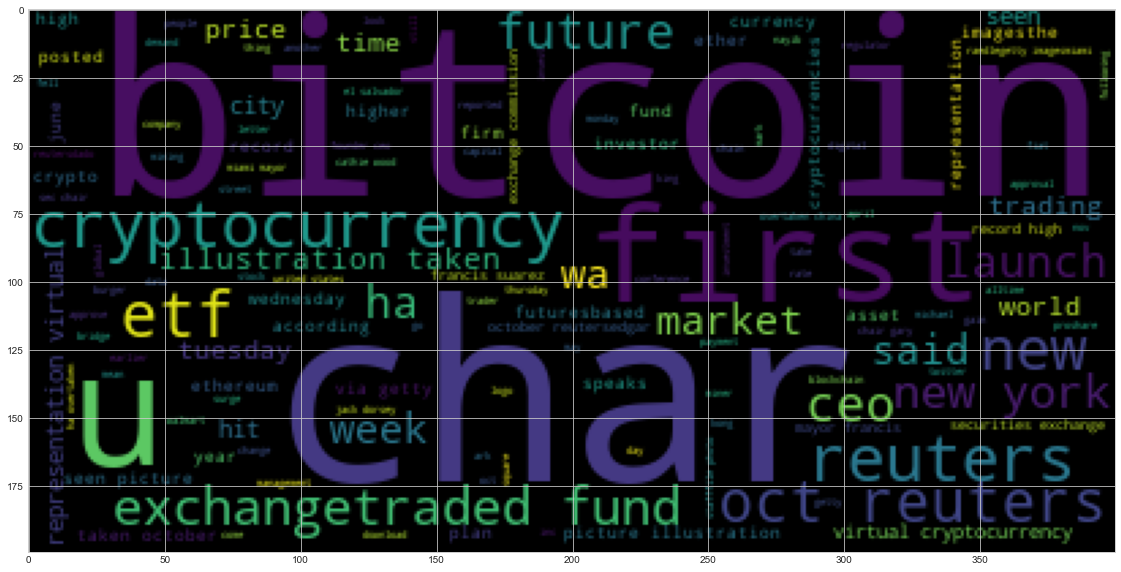

In [32]:
# Generate the Bitcoin word cloud
btc_all_words = ' '.join(btc_processed)
btc_wc = WordCloud().generate(btc_all_words)
plt.imshow(btc_wc)

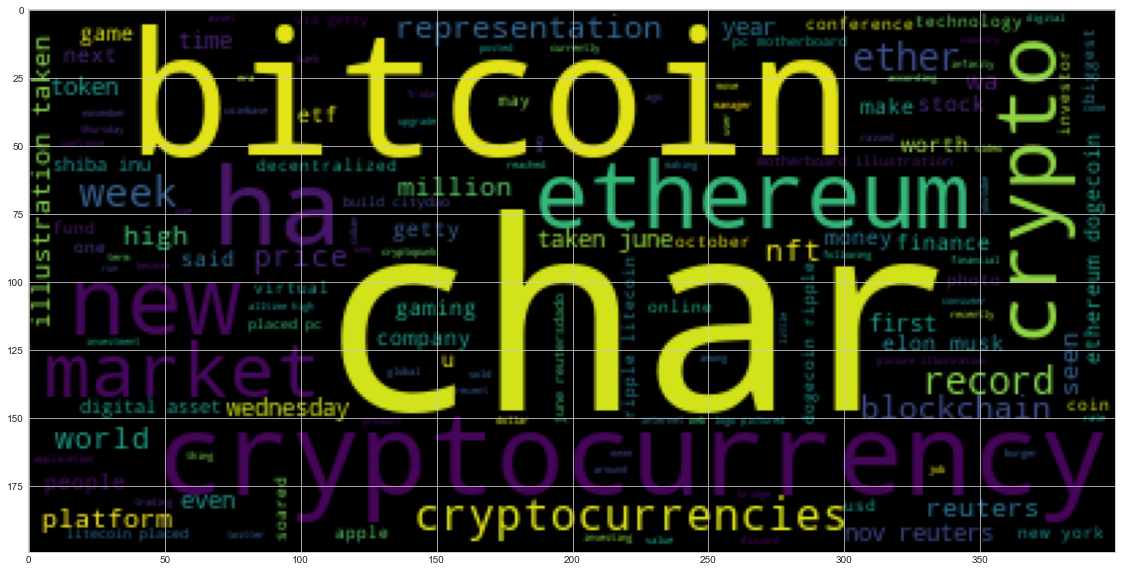

In [33]:
# Generate the Ethereum word cloud
eth_all_words = ' '.join(eth_processed)
eth_wc = WordCloud().generate(eth_all_words)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy

In [35]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 708 kB/s eta 0:00:01     |███████████████████████████████ | 13.2 MB 3.5 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [36]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [37]:
# Concatenate all of the Bitcoin text together
btc_big_string[:250]

'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars] Theres a big new presence slurping '

In [38]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_big_string)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [39]:
# Render the visualization
displacy.render( btc_doc, style='ent')

In [40]:
# List all Entities
print([ent.text for ent in btc_doc.ents if ent.label_ == 'GPE'])

['U.S.', 'U.S.', 'China', 'U.S.', 'U.S.', 'Mexico City', 'Mexico', 'U.S.', 'U.S.', 'U.S.', 'Barcelona', 'Washington', 'U.S.', 'Washington', 'US', 'ORLANDO', 'Fla.', 'U.S.', 'ORLANDO', 'Fla.', 'U.S.', 'Lucas Jac', 'The United States', 'China', 'LONDON', 'English county', 'Miami', 'Miami', 'Taproot', 'The United States', 'China', 'US', 'US', 'U.S.', 'New York', 'New York City', 'U.S.', 'New York', 'New York City', 'U.S.', 'NEW YORK', 'Bradford', 'Pennsylvania', 'U.S.', 'US', 'China', 'Beijing', 'El Salvador', 'U.S.', 'London', 'Britain', 'Square', 'LONDON', 'New York City', 'Brooklyn', 'New York', 'U.S.', 'LONDON', 'New York', 'El Salvador', 'US', 'Miami', 'Miami', "El Salvador's", 'Miami', 'Miami', 'US', 'Dallas', 'US', 'El Salvador', 'Robinhood']


---

### Ethereum NER

In [41]:
# Concatenate all of the Ethereum text together
eth_big_string[:250]

'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.\r\nNervos\xa0today announced that the Force Bridge is … [+3114 chars] Mark Cuban has some advice for peop'

In [42]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_big_string)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [43]:
# Render the visualization
displacy.render( eth_doc, style='ent')

In [44]:
# List all Entities
print([ent.text for ent in eth_doc.ents if ent.label_ == 'GPE'])

['Robinhood', 'NEW YORK', 'New York', 'LONDON', 'Toronto', 'Australia', 'Sydney', 'NEW YORK', 'U.K.', 'the United States', 'The United States', 'China', 'Sashkin', 'Wyoming', 'Wyoming', 'Kingship', 'Kingship', 'Shanghai', 'China', 'Tokyo', 'Japan', 'Hong Kong', 'Tokyo', 'Japan', 'Hong Kong', 'China', 'US', 'Manhattan', 'Omaha', 'N', 'Grimes', 'Taproot', 'El Salvador', 'US', 'Wonderland', 'U.S.', 'LONDON', 'U.S.', 'London']


---